# Full loans dataset schema

- **id**: unique id of the loan
- **member_id**: id of the member to took out the loan
- **loan_amount**: amount of loan the applicant received
- **funded_amount**: The total amount committed to the loan at the point in time 
- **funded_amount_inv**: The total amount committed by investors for that loan at that point in time 
- **term**: The number of monthly payments for the loan
- **int_rate**: Interest rate on the loan
- **instalment**: The monthly payment owned by the borrower
- **grade**: LC assigned loan grade
- **sub_grade**: LC assigned loan sub grade
- **employment_length**: Employment length in years.
- **home_ownership**: The home ownership status provided by the borrower
- **annual_inc**: The annual income of the borrower
- **verification_status**: Indicates whether the borrowers income was verified by the LC or the income source was verified
- **issue_date:** Issue date of the loan
- **loan_status**: Current status of the loan
- **payment_plan**: Indicates if a payment plan is in place for the loan. Indication borrower is struggling to pay.
- **purpose**: A category provided by the borrower for the loan request.
- **dti**: A ratio calculated using the borrowerâ€™s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowerâ€™s self-reported monthly income.
- **delinq_2yr**: The number of 30+ days past-due payment in the borrower's credit file for the past 2 years.
- **earliest_credit_line**: The month the borrower's earliest reported credit line was opened
- **inq_last_6mths**: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- **mths_since_last_record**: The number of months since the last public record.
- **open_accounts**: The number of open credit lines in the borrower's credit file.
- **total_accounts**: The total number of credit lines currently in the borrower's credit file
- **out_prncp**: Remaining outstanding principal for total amount funded
- **out_prncp_inv**: Remaining outstanding principal for portion of total amount funded by investors
- **total_payment**: Payments received to date for total amount funded
- **total_rec_int**: Interest received to date
- **total_rec_late_fee**: Late fees received to date
- **recoveries**: post charge off gross recovery
- **collection_recovery_fee**: post charge off collection fee
- **last_payment_date**: Last month payment was received
- **last_payment_amount**: Last total payment amount received
- **next_payment_date**: Next scheduled payment date
- **last_credit_pull_date**: The most recent month LC pulled credit for this loan
- **collections_12_mths_ex_med**: Number of collections in 12 months excluding medical collections
- **mths_since_last_major_derog**: Months since most recent 90-day or worse rating
- **policy_code**: publicly available policy_code=1 new products not publicly available policy_code=2
- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [164]:

    import yaml
    import pandas as pd
    import sqlalchemy
    import seaborn as sns
    import transformations
    class RDSDatabaseConnector:
        def get_creds(self):
            with open("credentials.yaml", "r") as file:
                result = dict(yaml.safe_load(file))
                return result

        def __init__(self):
            creds = self.get_creds()
            creds_string = f"postgresql://{creds['RDS_USER']}:{creds['RDS_PASSWORD']}@{creds['RDS_HOST']}:{creds['RDS_PORT']}/{creds['RDS_DATABASE']}"
            self.engine = sqlalchemy.create_engine(creds_string)

        def execute_query(self, query):
            with self.engine.connect() as conn:
                result = conn.execute(query)
                return result.fetchall()

        def extract_data(self):
            result = pd.DataFrame(self.execute_query("SELECT * FROM loan_payments"))
            return result

        def save_extracted_data(self):
            data = self.extract_data()
            data.to_csv("loan_data.csv")

    # # Usage
    # db_connector = RDSDatabaseConnector()
    # rows = db_connector.execute_query("SELECT * FROM loan_payments")
    # for row in rows:
    #     print(row)




In [21]:
data = pd.read_csv('loan_data.csv')

In [22]:
data.shape

(54231, 45)

# EDA FINDINGS 
- 44 Columns
- 54231 entries 
## COLUMNS WITH NULLS 
funded_amount
term
int_rate
employment_length
mths_since_last_delinq
mths_since_last_record
last_payment_date
next_payment_date
last_credit_pull_date
collections_12_mths_ex_med
mths_since_last_major_derog

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 54231 non-null  int64  
 1   Unnamed: 0                   54231 non-null  int64  
 2   id                           54231 non-null  int64  
 3   member_id                    54231 non-null  int64  
 4   loan_amount                  54231 non-null  int64  
 5   funded_amount                51224 non-null  float64
 6   funded_amount_inv            54231 non-null  float64
 7   term                         49459 non-null  float64
 8   int_rate                     49062 non-null  float64
 9   instalment                   54231 non-null  float64
 10  grade                        54231 non-null  object 
 11  sub_grade                    54231 non-null  object 
 12  employment_length            52113 non-null  float64
 13  home_ownership  

In [24]:
null_cols = data.isnull()

In [25]:
null_cols = data.columns[data.isnull().any()].to_list()

In [26]:
null_cols

['funded_amount',
 'term',
 'int_rate',
 'employment_length',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_payment_date',
 'next_payment_date',
 'last_credit_pull_date',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog']

In [27]:
for col in null_cols:
    print(col)
    

funded_amount
term
int_rate
employment_length
mths_since_last_delinq
mths_since_last_record
last_payment_date
next_payment_date
last_credit_pull_date
collections_12_mths_ex_med
mths_since_last_major_derog


In [28]:
data.sample(2)

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
34228,34228,34228,1045826,1276245,6000,6000.0,6000.0,36.0,6.03,182.62,...,0.0,0.0,2019-09-01,136.46,NaN,2020-02-01,0.0,NaN,1,INDIVIDUAL
3354,3354,3354,37791893,40554927,6000,6000.0,6000.0,36.0,15.59,209.73,...,0.0,0.0,2022-01-01,223.22,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL


In [29]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'member_id', 'loan_amount',
       'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment',
       'grade', 'sub_grade', 'employment_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_date', 'loan_status',
       'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv',
       'total_payment', 'total_payment_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'next_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type'],
      dtype='object')

In [169]:
cols_numeric_required = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'open_accounts', 'total_accounts','total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
'collection_recovery_fee', 'collections_12_mths_ex_med']

In [170]:
df[cols_numeric_required] = pd.to_numeric(df[cols_numeric_required])

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
data[cols_numeric_required].sample(5)

,loan_amount,funded_amount,funded_amount_inv,int_rate,open_accounts,total_accounts,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog
23232,12000,12000.0,12000.0,13.67,5,9,11021.500000,11021.50,8526.90,2494.60,0.0,0.00,0.00,0.0,NaN
13319,2000,2000.0,2000.0,14.30,9,12,2396.468209,2396.47,2000.00,396.47,0.0,0.00,0.00,0.0,NaN
628,8000,8000.0,8000.0,11.99,7,12,8799.930000,8799.93,8000.00,799.93,0.0,0.00,0.00,0.0,NaN
27249,11625,11625.0,11625.0,15.61,18,39,7006.960000,7006.96,3784.47,3222.49,0.0,0.00,0.00,0.0,NaN
45486,2500,2500.0,2200.0,7.14,6,24,1974.790000,1737.39,1673.49,254.26,0.0,47.04,0.67,0.0,NaN


In [ ]:
for col in cols_numeric_required:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   54231 non-null  int64  
 1   id                           54231 non-null  int64  
 2   member_id                    54231 non-null  int64  
 3   loan_amount                  54231 non-null  int64  
 4   funded_amount                51224 non-null  float64
 5   funded_amount_inv            54231 non-null  float64
 6   term                         49459 non-null  object 
 7   int_rate                     49062 non-null  float64
 8   instalment                   54231 non-null  float64
 9   grade                        54231 non-null  object 
 10  sub_grade                    54231 non-null  object 
 11  employment_length            52113 non-null  object 
 12  home_ownership               54231 non-null  object 
 13  annual_inc      

In [ ]:
data.describe()

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,...,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,54231.000000,5.423100e+04,5.423100e+04,54231.000000,51224.000000,54231.000000,49062.000000,54231.000000,5.423100e+04,54231.000000,...,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54180.000000,7499.000000,54231.0
mean,27115.000000,7.621797e+06,8.655350e+06,13333.076100,13229.509117,12952.622979,13.507328,400.013953,7.222085e+04,15.867087,...,11788.946618,9407.048589,2577.757101,0.901512,93.501288,10.859057,3130.706393,0.004208,42.253634,1.0
std,15655.285561,9.571362e+06,1.031281e+07,8082.196709,8019.017599,8099.473527,4.392893,238.920012,5.158934e+04,7.623124,...,8363.508506,6958.124264,2581.657345,6.215792,630.843636,120.193950,5323.801675,0.070990,21.052360,0.0
min,0.000000,5.552100e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,3.300000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,13557.500000,7.594330e+05,9.587720e+05,7000.000000,7000.000000,6700.000000,10.370000,224.205000,4.500000e+04,10.200000,...,5658.815000,4264.350000,889.560000,0.000000,0.000000,0.000000,289.790000,0.000000,26.000000,1.0
50%,27115.000000,7.084590e+06,8.709873e+06,12000.000000,12000.000000,11300.000000,13.160000,347.150000,6.100000e+04,15.600000,...,9835.830000,7644.920000,1734.640000,0.000000,0.000000,0.000000,562.670000,0.000000,42.000000,1.0
75%,40672.500000,8.860616e+06,1.052714e+07,18000.000000,18000.000000,18000.000000,16.200000,527.550000,8.600000e+04,21.260000,...,15978.200000,12505.625000,3323.765000,0.000000,0.000000,0.000000,3738.120000,0.000000,59.000000,1.0
max,54230.000000,3.867612e+07,4.146185e+07,35000.000000,35000.000000,35000.000000,26.060000,1407.010000,2.039784e+06,39.910000,...,55061.000000,35000.020000,23062.450000,358.680000,27750.000000,7002.190000,36115.200000,4.000000,146.000000,1.0


In [ ]:
import transformations

In [162]:
datecols= [col for col in data.columns if 'date' in col]

In [163]:
transformations.Transforms.cols_to_datetime(datecols, data)

NameError: name 'transformations' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   54231 non-null  int64         
 1   id                           54231 non-null  int64         
 2   member_id                    54231 non-null  int64         
 3   loan_amount                  54231 non-null  int64         
 4   funded_amount                51224 non-null  float64       
 5   funded_amount_inv            54231 non-null  float64       
 6   term                         49459 non-null  object        
 7   int_rate                     49062 non-null  float64       
 8   instalment                   54231 non-null  float64       
 9   grade                        54231 non-null  object        
 10  sub_grade                    54231 non-null  object        
 11  employment_length            52113 non-nu

In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [ ]:
data.groupby('loan_status').describe()

id                \
                                                      count          mean   
loan_status                                                                 
Charged Off                                          5571.0  5.288030e+06   
Current                                             19268.0  1.299020e+07   
Default                                                52.0  9.624598e+06   
Does not meet the credit policy. Status:Charged...    368.0  3.844220e+05   
Does not meet the credit policy. Status:Fully Paid    984.0  4.009459e+05   
Fully Paid                                          27037.0  4.454480e+06   
In Grace Period                                       265.0  1.106917e+07   
Late (16-30 days)                                     106.0  1.620923e+07   
Late (31-120 days)                                    580.0  1.286067e+07   

                                                                          \
                                                         min         25%   
loan_status                                                                
Charged Off                                          61419.0   700027.00   
Current                                             356706.0  7306748.00   
Default                                             609371.0  7075521.50   
Does not meet the credit policy. Status:Charged...   56413.0   251555.00   
Does not meet the credit policy. Status:Fully Paid   55521.0   306595.25   
Fully Paid                                           55742.0   606548.00   
In Grace Period                                     645021.0  7068593.00   
Late (16-30 days)                                   624521.0  7627979.75   
Late (31-120 days)                                  560150.0  7364797.00   

                                                                            \
                                                          50%          75%   
loan_status                                                                  
Charged Off                                         6704799.0   8194655.50   
Current                                             8589107.5   9785256.00   
Default                                             7947327.5   9058834.75   
Does not meet the credit policy. Status:Charged...   388717.0    518048.25   
Does not meet the credit policy. Status:Fully Paid   420008.5    504541.00   
Fully Paid                                           972601.0   7689656.00   
In Grace Period                                     7924777.0   9196455.00   
Late (16-30 days)                                   8943168.5  37570062.50   
Late (31-120 days)                                  8612383.5   9775957.00   

                                                                              \
                                                           max           std   
loan_status                                                                    
Charged Off                                         38656067.0  6.465143e+06   
Current                                             38676116.0  1.165641e+07   
Default                                             38556083.0  8.726418e+06   
Does not meet the credit policy. Status:Charged...    640893.0  1.556542e+05   
Does not meet the credit policy. Status:Fully Paid    641638.0  1.420494e+05   
Fully Paid                                          38656154.0  6.191486e+06   
In Grace Period                                     38635085.0  1.010332e+07   
Late (16-30 days)                                   38625326.0  1.397001e+07   
Late (31-120 days)                                  38655869.0  1.138809e+07   

                                                   member_id                \
                                                       count          mean   
loan_status                                                                  
Charged Off                                           5571.0  6.098112e+06   
Current  

In [ ]:
a = [col for col in data.columns if 'status' in col]

In [ ]:
a

['verification_status', 'loan_status']

In [ ]:
data.a.value_counts()

AttributeError: 'DataFrame' object has no attribute 'a'

In [ ]:
data[a].value_counts()

verification_status  loan_status                                        
Not Verified         Fully Paid                                             10086
Verified             Fully Paid                                              9521
                     Current                                                 8125
Source Verified      Fully Paid                                              7430
                     Current                                                 6413
Not Verified         Current                                                 4730
Verified             Charged Off                                             2358
Not Verified         Charged Off                                             1632
Source Verified      Charged Off                                             1581
Not Verified         Does not meet the credit policy. Status:Fully Paid       647
Verified             Late (31-120 days)                                       272
Not Verified         Does

In [ ]:
data['annual_inc'].dtype

dtype('float64')

In [ ]:
tt = [xol for xol in data.columns if data[xol].dtype == 'O']

In [ ]:
tt

['term',
 'grade',
 'sub_grade',
 'employment_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'earliest_credit_line',
 'application_type']

In [ ]:
data[tt].value_counts()

NameError: name 'tt' is not defined

In [ ]:
for t in tt:
   print(f' column name: {t}  value counts:  {data[t].value_counts()}')

 column name: term  value counts:  term
36 months    35845
60 months    13614
Name: count, dtype: int64
 column name: grade  value counts:  grade
B    16369
C    13600
A     9818
D     8157
E     4072
F     1694
G      521
Name: count, dtype: int64
 column name: sub_grade  value counts:  sub_grade
B3    3641
B4    3542
B2    3241
C1    3018
B5    3016
C2    2962
B1    2929
C3    2794
A5    2789
A4    2645
C4    2512
C5    2314
D1    1838
D2    1809
A3    1752
D3    1647
D4    1509
A2    1481
D5    1354
A1    1151
E1     989
E2     985
E3     817
E4     658
E5     623
F1     486
F2     390
F3     326
F4     287
F5     205
G1     156
G2     133
G3      87
G4      74
G5      71
Name: count, dtype: int64
 column name: employment_length  value counts:  employment_length
10+ years    15907
2 years       5066
< 1 year      5034
3 years       4589
5 years       3836
1 year        3708
4 years       3482
6 years       3059
7 years       2964
8 years       2537
9 years       1931
Name: count, dt

In [34]:
cateogric_columns = ['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'application_type']

In [ ]:
cateogric_columns


['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'payment_plan',
 'purpose',
 'application_type']

In [35]:
for col in cateogric_columns:
    data[col] = data[col].astype('category')

In [ ]:
data['home_ownership'].dtype

CategoricalDtype(categories=['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], ordered=False, categories_dtype=object)

In [36]:
data['earliest_credit_line'] = pd.to_datetime(data['earliest_credit_line'], errors='coerce')

In [38]:
data.to_csv('loan_data.csv')

# Now the data types look correct.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0.1                 54231 non-null  int64         
 1   Unnamed: 0                   54231 non-null  int64         
 2   id                           54231 non-null  int64         
 3   member_id                    54231 non-null  int64         
 4   loan_amount                  54231 non-null  int64         
 5   funded_amount                51224 non-null  float64       
 6   funded_amount_inv            54231 non-null  float64       
 7   term                         49459 non-null  category      
 8   int_rate                     49062 non-null  float64       
 9   instalment                   54231 non-null  float64       
 10  grade                        54231 non-null  category      
 11  sub_grade                    54231 non-nu

In [19]:
datecols

NameError: name 'datecols' is not defined

In [ ]:
for column in datecols:
    data[column] = pd.to_datetime(data[column])

/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_37755/4027835274.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column])
/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_37755/4027835274.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column])
/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_37755/4027835274.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column] = pd.to_datetime(data[column])
/var/folders/4n/18wn5fm9177dpn28hhj4f8w00000gn/T/ipykernel_37755

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0.1                 54231 non-null  int64         
 1   Unnamed: 0                   54231 non-null  int64         
 2   id                           54231 non-null  int64         
 3   member_id                    54231 non-null  int64         
 4   loan_amount                  54231 non-null  int64         
 5   funded_amount                51224 non-null  float64       
 6   funded_amount_inv            54231 non-null  float64       
 7   term                         49459 non-null  category      
 8   int_rate                     49062 non-null  float64       
 9   instalment                   54231 non-null  float64       
 10  grade                        54231 non-null  category      
 11  sub_grade                    54231 non-nu

In [41]:
data.employment_length.dtype

dtype('float64')

In [44]:
data['employment_length'] = data['employment_length'].fillna(0)
data['employment_length'] = data['employment_length'].str.extract('(\d+)')
data['employment_length'] = data['employment_length'].astype(float).astype('Int64')  # 'Int64' (capital I) allows for NaN values in integer columns

AttributeError: Can only use .str accessor with string values!

In [ ]:
data.employment_length.rename('employment_length_years', inplace=True)

0         5
1         9
2         8
3         1
4        10
         ..
54226     1
54227     1
54228    10
54229     4
54230     9
Name: employment_length_years, Length: 54231, dtype: Int64

In [ ]:
data.employment_length.dtype

Int64Dtype()

In [ ]:
data.to_csv('loan_data.csv')

In [81]:
df = pd.read_csv('loan_data.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.2                 54231 non-null  int64  
 1   Unnamed: 0.1                 54231 non-null  int64  
 2   Unnamed: 0                   54231 non-null  int64  
 3   id                           54231 non-null  int64  
 4   member_id                    54231 non-null  int64  
 5   loan_amount                  54231 non-null  int64  
 6   funded_amount                51224 non-null  float64
 7   funded_amount_inv            54231 non-null  float64
 8   term                         49459 non-null  float64
 9   int_rate                     49062 non-null  float64
 10  instalment                   54231 non-null  float64
 11  grade                        54231 non-null  object 
 12  sub_grade                    54231 non-null  object 
 13  employment_lengt

In [73]:
df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [79]:
df.term = df.term.astype('str')
df['term'].str.extract('(\d+)')

,0
0,36
1,36
2,36
3,36
4,36
...,...
54226,36
54227,36
54228,36
54229,36


In [ ]:
df.term = df.term.rename('term_months', inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.2                 54231 non-null  int64  
 1   Unnamed: 0.1                 54231 non-null  int64  
 2   Unnamed: 0                   54231 non-null  int64  
 3   id                           54231 non-null  int64  
 4   member_id                    54231 non-null  int64  
 5   loan_amount                  54231 non-null  int64  
 6   funded_amount                51224 non-null  float64
 7   funded_amount_inv            54231 non-null  float64
 8   term                         49459 non-null  float64
 9   int_rate                     49062 non-null  float64
 10  instalment                   54231 non-null  float64
 11  grade                        54231 non-null  object 
 12  sub_grade                    54231 non-null  object 
 13  employment_lengt

In [49]:
obj = [col for col in df.columns if df[col].dtype == 'O']

In [50]:
for o in obj:
    df[o] = df[o].astype('category')

In [51]:
datecols = ['issue_date',
 'last_payment_date',
 'next_payment_date',
 'last_credit_pull_date',
 'earliest_credit_line']

In [52]:
for col in datecols:
    df[col] = pd.to_datetime(df[col])

In [53]:
df.sample(2)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
48872,48872,48872,48872,499679,641456,5000,5000.0,5000.0,36.0,13.85,...,0.0,0.0,2018-04-01,391.77,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
37437,37437,37437,37437,867178,1080775,12000,12000.0,12000.0,36.0,NaN,...,0.0,0.0,2020-10-01,377.12,NaT,2022-01-01,0.0,NaN,1,INDIVIDUAL


In [ ]:
df.to_csv('loan_data.csv') # Overwritten with clean data

Describe all columns in the DataFrame to check their data types
Extract statistical values: median, standard deviation and mean from the columns and the DataFrame
Count distinct values in categorical columns
Print out the shape of the DataFrame
Generate a count/percentage count of NULL values in each column
Any other methods you may find useful



In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True )

In [ ]:
for column in df.columns:
    print(f'description of column, {column}: {df[column].describe()}')

description of column, id: count    5.423100e+04
mean     7.621797e+06
std      9.571362e+06
min      5.552100e+04
25%      7.594330e+05
50%      7.084590e+06
75%      8.860616e+06
max      3.867612e+07
Name: id, dtype: float64
description of column, member_id: count    5.423100e+04
mean     8.655350e+06
std      1.031281e+07
min      7.069400e+04
25%      9.587720e+05
50%      8.709873e+06
75%      1.052714e+07
max      4.146185e+07
Name: member_id, dtype: float64
description of column, loan_amount: count    54231.000000
mean     13333.076100
std       8082.196709
min        500.000000
25%       7000.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: loan_amount, dtype: float64
description of column, funded_amount: count    51224.000000
mean     13229.509117
std       8019.017599
min        500.000000
25%       7000.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: funded_amount, dtype: float64
description of column, funded_amou

## percentage of nulls in each column: 

In [ ]:
for column in df.columns:
    print(f"the percentage of nulls for column {column}: is {df[column].isnull().sum()/ 54231* 100.0}")


NameError: name 'df' is not defined

In [54]:
df.isnull().sum().sort_values(ascending=False)

mths_since_last_record         48050
mths_since_last_major_derog    46732
next_payment_date              32608
mths_since_last_delinq         31002
int_rate                        5169
term                            4772
funded_amount                   3007
employment_length               2118
last_payment_date                 73
collections_12_mths_ex_med        51
last_credit_pull_date              7
total_payment_inv                  0
total_accounts                     0
open_accounts                      0
out_prncp                          0
out_prncp_inv                      0
total_payment                      0
Unnamed: 0.2                       0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
last_payment_amount                0
policy_code                        0
collection_recovery_fee            0
earliest_credit_line               0
inq_last_6mths                     0
U

In [ ]:
# Could consider dropping top 3 null count: mths_since_last_record,  mths_since_last_major_derog, next_payment_date  

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [56]:
nulls_df = pd.DataFrame(df.isnull().sum())

In [55]:
nulls_df.rename({0: 'null_count'}, axis=1, inplace=True)

NameError: name 'nulls_df' is not defined

In [ ]:
nulls_df.columns.values[0] = 'column_name'

In [ ]:
nulls_df.iloc[2]

column_name    0
Name: loan_amount, dtype: int64

In [57]:
nulls_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Unnamed: 0.2 to application_type
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       46 non-null     int64
dtypes: int64(1)
memory usage: 1.8+ KB


In [ ]:
nulls_df = nulls_df.reset_index()

In [ ]:
nulls_df.columns.values[0] = 'column_name'
nulls_df.columns.values[1] = 'nulls_count'

In [ ]:
nulls_df.columns.values[1] = 'null_count'

In [58]:
nulls_df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
print(nulls_df.columns)

Index(['column_name', 'null_count'], dtype='object')


In [ ]:
nulls_df(nulls_df['nulls_count']== 0)


KeyError: 'nulls_count'

In [ ]:
df = pd.read_csv('loan_data.csv')

In [ ]:
df.dtypes

Unnamed: 0.1                     int64
Unnamed: 0                       int64
id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                           float64
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length              float64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record   

In [68]:
nulls_df[0].sns.histplot()

AttributeError: 'Series' object has no attribute 'sns'

In [69]:
nulls_df.drop(1)
nulls_df.drop(0)

KeyError: '[1] not found in axis'

In [80]:
 def term_string_to_int_months(df):
        df.term = df.term.astype('str')
        df['term'] = df['term'].str.extract('(\d+)')
        df['term'] = pd.to_numeric(df['term'])
        



In [82]:
term_string_to_int_months(df)

In [83]:
df.term.info

<bound method Series.info of 0        36.0
1        36.0
2        36.0
3        36.0
4        36.0
         ... 
54226    36.0
54227    36.0
54228    36.0
54229    36.0
54230    36.0
Name: term, Length: 54231, dtype: float64>


## Nulls exploration


In [86]:
df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [224]:


# Assuming df is your original DataFrame
nulls = pd.DataFrame(df.isnull().sum()).reset_index()
nulls.columns = ['column', 'null_count']
nulls['percentage'] = (nulls['null_count'] / 54231) * 100


In [225]:
nulls.sort_values('null_count',ascending=False)

,column,null_count,percentage
36,next_payment_date,32608,60.127971
22,mths_since_last_delinq,31002,57.166565
6,int_rate,5169,9.531449
5,term,4772,8.799395
3,funded_amount,3007,5.544799
10,employment_length,2118,3.905515
34,last_payment_date,73,0.134609
38,collections_12_mths_ex_med,51,0.094042
37,last_credit_pull_date,7,0.012908
35,last_payment_amount,0,0.000000


In [120]:
import seaborn as sns

In [126]:
top_ten_null_columns = nulls.sort_values('null_count', ascending=False).head(20)

In [127]:
top_ten_null_columns

,column,null_count
23,mths_since_last_record,48050
40,mths_since_last_major_derog,46732
37,next_payment_date,32608
22,mths_since_last_delinq,31002
6,int_rate,5169
5,term,4772
3,funded_amount,3007
10,employment_length,2118
35,last_payment_date,73
39,collections_12_mths_ex_med,51


In [128]:
nulls[nulls['null_count']>0]

,column,null_count
3,funded_amount,3007
5,term,4772
6,int_rate,5169
10,employment_length,2118
22,mths_since_last_delinq,31002
23,mths_since_last_record,48050
35,last_payment_date,73
37,next_payment_date,32608
38,last_credit_pull_date,7
39,collections_12_mths_ex_med,51


In [148]:
 import matplotlib.pyplot as plt
 def nulls_by_feature(nulls):
        sns.set_palette("viridis")
        nulls = nulls[nulls['null_count']>0].sort_values('null_count', ascending=False)
        sns.barplot(x='null_count'/ 54231 , y='column', data=nulls)
        plt.title('Top 10 Columns by Null Count')
        plt.xlabel('Count of Null Values')
        plt.ylabel('Columns')
        plt.show()

In [149]:
nulls_by_feature(nulls)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [222]:
nulls[nulls['null_count']>0]

,column,null_count
3,funded_amount,3007
5,term,4772
6,int_rate,5169
10,employment_length,2118
22,mths_since_last_delinq,31002
23,mths_since_last_record,48050
35,last_payment_date,73
37,next_payment_date,32608
38,last_credit_pull_date,7
39,collections_12_mths_ex_med,51


In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

def nulls_by_feature(nulls):
    sns.set_palette("viridis")
    
    # Filter out columns with no nulls and sort by null_count
    nulls = nulls[nulls['null_count'] > 0].sort_values('null_count', ascending=False)
    
    

    # Plotting using the calculated percentages
    sns.barplot(x='percentage', y='column', data=nulls)
    
    plt.title('Top Columns by Null Count as Percentage')
    plt.xlabel('Percentage of Null Values')
    plt.ylabel('Columns')
    plt.show()

# Use the function with your DataFrame
# nulls_by_feature(nulls)




In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

def nulls_by_feature(nulls):
    sns.set_palette("viridis")
    
    # Filter out columns with no nulls and sort by null_count
    nulls = nulls[nulls['null_count'] > 0].sort_values('null_count', ascending=False)
    
    # Calculate the percentage of nulls
    nulls['percentage'] = (nulls['null_count'] / 54231) * 100

    # Plotting using the calculated percentages
    ax = sns.barplot(x='percentage', y='column', data=nulls)
    
    plt.title('Top Columns by Null Count as Percentage')
    plt.xlabel('Percentage of Null Values')
    plt.ylabel('Columns')

    # Adding annotations
    for p in ax.patches:
        width = p.get_width()    # get bar length
        plt.text(width + 0.3,    # set the text at 0.3 unit right of the bar
                 p.get_y() + p.get_height() / 2, # get Y coordinate + half of the bar height
                 '{:1.2f}%'.format(width), # format the value as a percentage
                 ha = 'left',   # horizontal alignment
                 va = 'center') # vertical alignment
    
    plt.show()

# Use the function with your DataFrame
# nulls_by_feature(nulls)


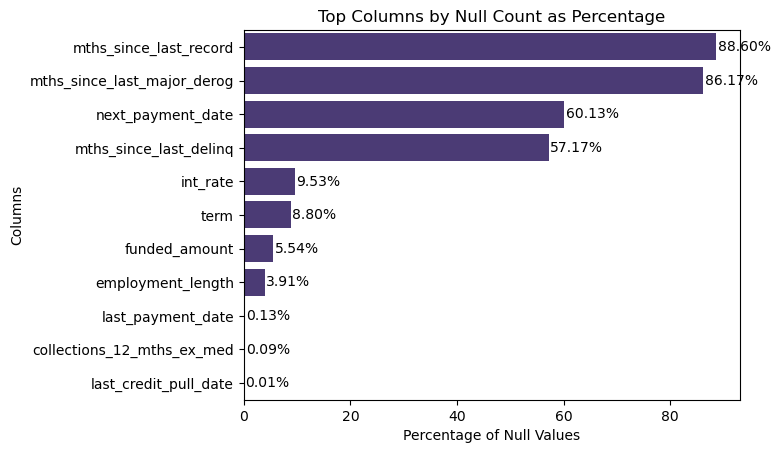

In [153]:
nulls_by_feature(nulls)

In [174]:
df.term.describe()

count    49459.000000
mean        42.606199
std         10.719573
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [210]:
datecols = [col for col in df.columns if 'date' in col]

In [212]:
datecols.append('earliest_credit_line')

In [214]:
datecols

['issue_date',
 'last_payment_date',
 'next_payment_date',
 'last_credit_pull_date',
 'earliest_credit_line']

In [213]:

for col in datecols:
    df[col] = pd.to_datetime(df[col], format="mixed")


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               51224 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        49459 non-null  float64       
 6   int_rate                    49062 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  category      
 9   sub_grade                   54231 non-null  category      
 10  employment_length           52113 non-null  float64       
 11  home_ownership              54231 non-null  category  

In [216]:
df.select_dtypes('O').astype('category')

""
0
1
2
3
4
...
54226
54227
54228
54229


In [217]:

# Assuming df is your DataFrame
# Select columns of object type and convert them to 'category'
object_cols = df.select_dtypes(include='O').columns
df[object_cols] = df[object_cols].astype('category')


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               51224 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        49459 non-null  float64       
 6   int_rate                    49062 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  category      
 9   sub_grade                   54231 non-null  category      
 10  employment_length           52113 non-null  float64       
 11  home_ownership              54231 non-null  category  

In [219]:
df.select_dtypes('category')

,grade,sub_grade,home_ownership,verification_status,loan_status,payment_plan,purpose,earliest_credit_line,application_type
0,A,A4,MORTGAGE,Not Verified,Current,n,credit_card,1987-10-01,INDIVIDUAL
1,A,A3,RENT,Not Verified,Current,n,credit_card,2001-09-01,INDIVIDUAL
2,A,A4,MORTGAGE,Source Verified,Fully Paid,n,credit_card,1998-09-01,INDIVIDUAL
3,C,C4,RENT,Source Verified,Fully Paid,n,debt_consolidation,2008-06-01,INDIVIDUAL
4,A,A1,MORTGAGE,Verified,Current,n,debt_consolidation,2002-04-01,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
54226,B,B2,MORTGAGE,Not Verified,Fully Paid,n,other,2003-04-01,INDIVIDUAL
54227,C,C2,RENT,Not Verified,Fully Paid,n,other,1999-01-01,INDIVIDUAL
54228,A,A2,MORTGAGE,Not Verified,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1984-02-01,INDIVIDUAL
54229,A,A2,RENT,Not Verified,Fully Paid,n,house,1995-03-01,INDIVIDUAL


In [199]:
df.earliest_credit_line = pd.to_datetime(df.earliest_credit_line, format='mixed')

In [203]:
df.earliest_credit_line = pd.to_datetime(df.earliest_credit_line)

In [205]:
df.loan_status.value_counts()

loan_status
Fully Paid                                             27037
Current                                                19268
Charged Off                                             5571
Does not meet the credit policy. Status:Fully Paid       984
Late (31-120 days)                                       580
Does not meet the credit policy. Status:Charged Off      368
In Grace Period                                          265
Late (16-30 days)                                        106
Default                                                   52
Name: count, dtype: int64

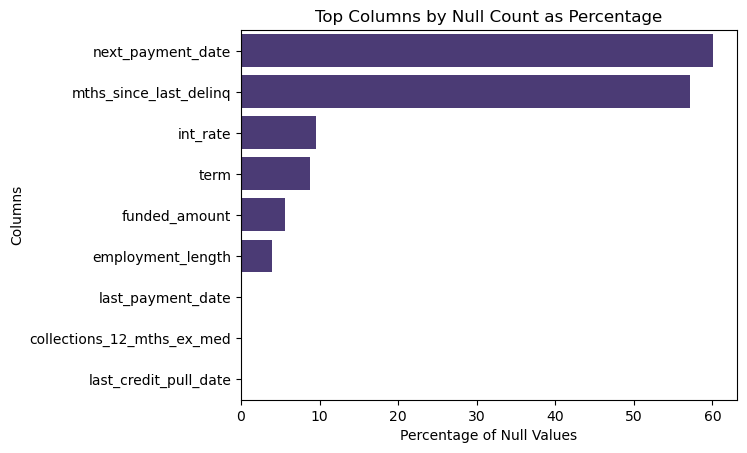

In [226]:
nulls_by_feature(nulls)

In [227]:
df.next_payment_date.fillna()

0       2022-02-01
1       2022-02-01
2              NaT
3              NaT
4       2022-02-01
           ...    
54226          NaT
54227          NaT
54228   2016-09-01
54229          NaT
54230   2014-12-01
Name: next_payment_date, Length: 54231, dtype: datetime64[ns]